# 🛒 Market Basket Analysis using Apriori Algorithm


This notebook demonstrates **Association Rule Mining** using the **Apriori algorithm** from the `mlxtend` library.  
We will use a small transaction dataset, convert it into a one-hot encoded DataFrame, extract frequent itemsets, and generate association rules.  
Finally, we will visualize the results with a graph.


In [1]:

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt


## Step 1: Create the Transaction Dataset

In [3]:

# Transaction dataset
dataset = [
    ['Milk', 'Bread', 'Butter'],
    ['Milk', 'Diaper', 'Beer', 'Bread'],
    ['Milk', 'Diaper', 'Beer', 'Cola'],
    ['Bread', 'Milk', 'Diaper', 'Beer'],
    ['Bread', 'Milk', 'Diaper', 'Cola']
]
dataset


[['Milk', 'Bread', 'Butter'],
 ['Milk', 'Diaper', 'Beer', 'Bread'],
 ['Milk', 'Diaper', 'Beer', 'Cola'],
 ['Bread', 'Milk', 'Diaper', 'Beer'],
 ['Bread', 'Milk', 'Diaper', 'Cola']]

## Step 2: Convert Dataset to One-Hot Encoding

In [4]:

# Convert dataset into one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df


,Beer,Bread,Butter,Cola,Diaper,Milk
0,False,True,True,False,False,True
1,True,True,False,False,True,True
2,True,False,False,True,True,True
3,True,True,False,False,True,True
4,False,True,False,True,True,True


### 🔹 One-Hot Encoding kya hota hai?
Jab dataset me **categorical values** (jaise `Red`, `Blue`, `Green`) hote hain, 
to machine learning algorithms unko directly samjh nahi paate.  
Isliye unko **numbers** me convert karna padta hai.

👉 **One-Hot Encoding ek technique hai jisme:**
- Har unique category ke liye ek alag column ban jata hai  
- Agar wo category present hai to column ka value **1** hoga, warna **0**  


### 🔹 Example
Maan lo tumhare dataset me ek column hai `Color`:

```
Color
Red
Blue
Green
Red
```

**One-Hot Encoding ke baad DataFrame aisa dikhega:**

```
Red   Blue   Green
 1     0      0
 0     1      0
 0     0      1
 1     0      0
```

In [ ]:
import pandas as pd

# Sample dataset
data = {'Color': ['Red', 'Blue', 'Green', 'Red']}
df = pd.DataFrame(data)

print("📌 Original Dataset:")
print(df)

# One-hot encoding
encoded_df = pd.get_dummies(df, columns=['Color'])

print("\n✅ One-Hot Encoded DataFrame:")
print(encoded_df)

### 🔹 Conclusion
👉 Matlab simple shabdon me:  
One-hot encoding ek tarika hai categorical data ko **0 aur 1 wale columns me todne ka**, 
taaki computer easily process kar sake.  


## Step 3: Find Frequent Itemsets using Apriori

In [4]:

# Find frequent itemsets with minimum support = 0.4
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)
frequent_itemsets


,support,itemsets
0,0.6,(Beer)
1,0.8,(Bread)
2,0.4,(Cola)
3,0.8,(Diaper)
4,1.0,(Milk)
5,0.4,"(Beer, Bread)"
6,0.6,"(Beer, Diaper)"
7,0.6,"(Beer, Milk)"
8,0.6,"(Diaper, Bread)"
9,0.8,"(Milk, Bread)"


## Step 4: Generate Association Rules

In [5]:

# Generate rules with minimum confidence = 0.6
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


c:\Users\yc993\.conda\envs\schlorhat\lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,support,confidence,lift
0,(Beer),(Bread),0.4,0.666667,0.833333
1,(Beer),(Diaper),0.6,1.000000,1.250000
2,(Diaper),(Beer),0.6,0.750000,1.250000
3,(Beer),(Milk),0.6,1.000000,1.000000
4,(Milk),(Beer),0.6,0.600000,1.000000
5,(Diaper),(Bread),0.6,0.750000,0.937500
6,(Bread),(Diaper),0.6,0.750000,0.937500
7,(Milk),(Bread),0.8,0.800000,1.000000
8,(Bread),(Milk),0.8,1.000000,1.000000
9,(Cola),(Diaper),0.4,1.000000,1.250000


## Step 5: Visualize Rules (Support vs Confidence)

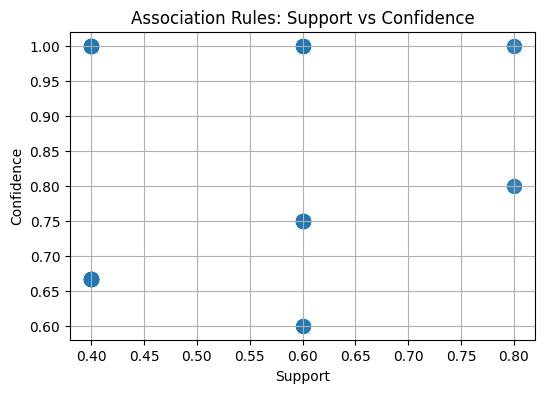

In [6]:

plt.figure(figsize=(6,4))
plt.scatter(rules['support'], rules['confidence'], s=100, alpha=0.7)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules: Support vs Confidence")
plt.grid(True)
plt.show()


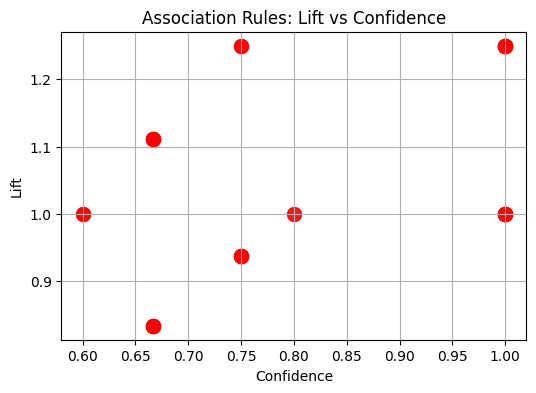

In [7]:
## Step 6: Visualize Rules (Lift vs Confidence)

plt.figure(figsize=(6,4))
plt.scatter(rules['confidence'], rules['lift'], s=100, alpha=0.7, c='red')
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.title("Association Rules: Lift vs Confidence")
plt.grid(True)
plt.show()


17 [ 0.10433769 -0.27741063]
19 [0.51758157 0.01731374]
15 [ 0.0356777  -0.60057324]
16 [-0.0331335   0.65263622]
35 [ 0.65833426 -0.17210919]
39 [-0.85181737  0.82584399]
38 [ 0.14395776 -0.0321159 ]
40 [-0.74716252 -0.0815668 ]
42 [ 0.21792822 -0.22193666]
43 [0.03442035 0.78133728]
5 [-0.70866098  0.40263586]
6 [-0.13768679  0.10075543]
22 [-0.92089846  0.81962816]
25 [-0.16830112  0.49214259]
26 [0.05450759 0.02552635]
28 [-0.36137454 -0.84390343]
29 [-0.71128679 -0.33699385]
31 [0.85413532 0.36263643]
32 [ 0.79538944 -0.44970917]
34 [ 0.86950053 -0.53750601]
20 [0.9903657 0.9830373]
23 [0.45059553 0.07727668]
37 [-0.96935339  0.14539685]
41 [-0.51437472  0.63785552]
1 [-0.54843324 -0.8577056 ]
14 [ 0.02206118 -0.9276126 ]
23 [-0.99562563 -0.73960457]
37 [-0.07476919  0.96071646]
9 [-0.61385695  0.87334503]
20 [-0.38229813 -0.55175295]
10 [ 0.84797899 -0.46481045]
12 [ 0.68837527 -0.60821046]


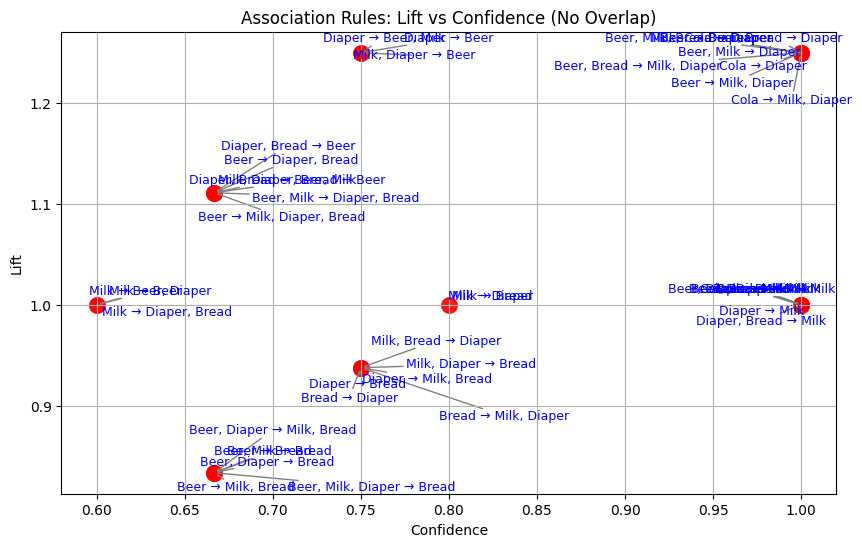

In [12]:
from adjustText import adjust_text

plt.figure(figsize=(10,6))
plt.scatter(rules['confidence'], rules['lift'], s=120, alpha=0.7, c='red')

texts = []
for i in range(len(rules)):
    antecedent = ', '.join(list(rules.iloc[i]['antecedents']))
    consequent = ', '.join(list(rules.iloc[i]['consequents']))
    label = f"{antecedent} → {consequent}"
    
    texts.append(
        plt.text(rules['confidence'].iloc[i],
                 rules['lift'].iloc[i],
                 label,
                 fontsize=9,
                 color='blue')
    )

# Auto adjust labels to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray'))

plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.title("Association Rules: Lift vs Confidence (No Overlap)")
plt.grid(True)
plt.show()


New Example Asso rule

In [2]:
# Association Rule Mining Example with Explanation
# -----------------------------------------------

# Step 1: Dataset
# We have 5 transactions with items bought together
dataset = [
    ['Milk', 'Bread'],
    ['Milk', 'Diaper', 'Beer'],
    ['Milk', 'Diaper', 'Bread'],
    ['Bread', 'Butter'],
    ['Diaper', 'Beer']
]
dataset


[['Milk', 'Bread'],
 ['Milk', 'Diaper', 'Beer'],
 ['Milk', 'Diaper', 'Bread'],
 ['Bread', 'Butter'],
 ['Diaper', 'Beer']]

In [3]:
# Step 2: One-hot Encoding
# Convert dataset into a format suitable for Apriori (True/False for each item)
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df


,Beer,Bread,Butter,Diaper,Milk
0,False,True,False,False,True
1,True,False,False,True,True
2,False,True,False,True,True
3,False,True,True,False,False
4,True,False,False,True,False


In [4]:
# Step 3: Frequent Itemsets using Apriori
# min_support = threshold value
# Threshold ka matlab hai minimum percentage of transactions jisme ek itemset aana chahiye
# Example: min_support = 0.2 -> at least 20% transactions me itemset hona chahiye
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets


,support,itemsets
0,0.4,(Beer)
1,0.6,(Bread)
2,0.2,(Butter)
3,0.6,(Diaper)
4,0.6,(Milk)
5,0.4,"(Diaper, Beer)"
6,0.2,"(Beer, Milk)"
7,0.2,"(Bread, Butter)"
8,0.2,"(Diaper, Bread)"
9,0.4,"(Bread, Milk)"


In [5]:
# Step 4: Generate Association Rules
# metric = 'lift' -> we are filtering rules based on lift value
# min_threshold = 1 -> means we only consider rules with lift >= 1
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules[['antecedents','consequents','support','confidence','lift']]


,antecedents,consequents,support,confidence,lift
0,(Diaper),(Beer),0.4,0.666667,1.666667
1,(Beer),(Diaper),0.4,1.000000,1.666667
2,(Bread),(Butter),0.2,0.333333,1.666667
3,(Butter),(Bread),0.2,1.000000,1.666667
4,(Bread),(Milk),0.4,0.666667,1.111111
5,(Milk),(Bread),0.4,0.666667,1.111111
6,(Diaper),(Milk),0.4,0.666667,1.111111
7,(Milk),(Diaper),0.4,0.666667,1.111111
8,"(Diaper, Milk)",(Beer),0.2,0.500000,1.250000
9,"(Beer, Milk)",(Diaper),0.2,1.000000,1.666667


In [6]:
# Step 5: Example Rule {Diaper} -> {Beer}
# We check specifically how strong the relation is between Diaper and Beer
rules[(rules['antecedents'] == {'Diaper'}) & (rules['consequents'] == {'Beer'})]
# Output: This will show the support, confidence, and lift for the rule {Diaper} -> {Beer}

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Diaper),(Beer),0.6,0.4,0.4,0.666667,1.666667,1.0,0.16,1.8,1.0,0.666667,0.444444,0.833333


🔹 Explanation of Thresholds

Support Threshold (min_support) → ek minimum limit jisse niche ke itemsets ko ignore kar dete hain (kyunki wo rare hote hain).

Confidence Threshold → agar chahiye to sirf unhi rules ko rakh sakte ho jinke confidence ek fixed % se zyada ho.

Lift Threshold → hum aise rules chunte hain jinka lift ≥ 1 ho, taaki random relations ignore ho jayein.

👉 Example me humne min_support=0.2 rakha (20%). Matlab agar koi itemset 5 transactions me se kam se kam 1 transaction (20%) me na aaye, to wo discard ho jayega.